## Download annotations 

URL -  s3://object-detection-training-achiya/dataset_artifacts/open_images_eva_v1/test.parquet

## Inspect Annotations

In [1]:
import pandas as pd

df = pd.read_parquet('../train.parquet')
df

,filename,label,confidence,col_x,row_y,width,height,source
0,/workspace/yolo_v8_training/oiv7_full/train/a8...,sock,0.943716,2620.00,560.000000,61.00,126.000000,EVA02
1,/workspace/yolo_v8_training/oiv7_full/train/a8...,sock,0.937813,2776.00,531.000000,88.00,144.000000,EVA02
2,/workspace/yolo_v8_training/oiv7_full/train/a8...,sock,0.928109,507.00,574.000000,75.00,140.000000,EVA02
3,/workspace/yolo_v8_training/oiv7_full/train/a8...,sock,0.892527,3688.00,708.000000,102.00,163.000000,EVA02
4,/workspace/yolo_v8_training/oiv7_full/train/a8...,shorts,0.873567,2613.00,366.000000,192.00,151.000000,EVA02
...,...,...,...,...,...,...,...,...
116200459,/workspace/yolo_v8_training/oiv7_full/train/ff...,human face,1.000000,321.28,62.789556,98.56,133.909663,oi_labels
116200460,/workspace/yolo_v8_training/oiv7_full/train/ff...,human face,1.000000,456.32,105.717472,232.32,31.394778,oi_labels
116200461,/workspace/yolo_v8_training/oiv7_full/train/ff...,human face,1.000000,712.32,80.729917,92.80,122.375842,oi_labels
116200462,/workspace/yolo_v8_training/oiv7_full/train/ff...,human face,1.000000,807.68,135.830942,47.36,49.975793,oi_labels


In [2]:
label_counts = df['label'].value_counts()

In [3]:
label_counts.to_csv('label.csv')

Visualize the top label counts

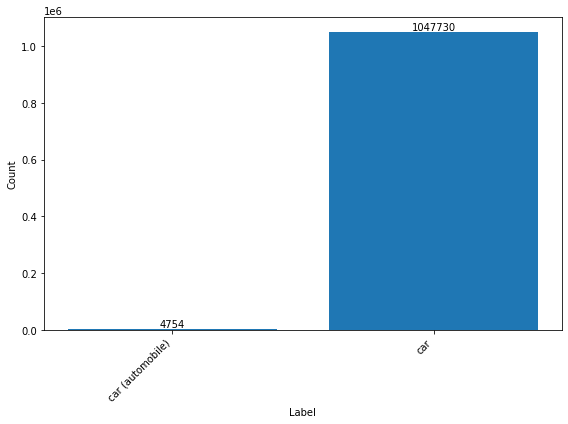

In [4]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

# Filter the label counts for the desired labels
desired_labels = ['car (automobile)', 'car']
filtered_counts = label_counts[desired_labels]

plt.figure(figsize=(8, 6))
bars = plt.bar(filtered_counts.index, filtered_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add value labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
# Get rows with school bus label
df = df[df['label'] == 'car (automobile)'] 
df

,filename,label,confidence,col_x,row_y,width,height,source
18789,/workspace/yolo_v8_training/oiv7_full/train/b0...,car (automobile),0.894639,325.0,77.0,680.0,382.0,EVA02
19317,/workspace/yolo_v8_training/oiv7_full/train/0f...,car (automobile),0.837718,380.0,268.0,459.0,198.0,EVA02
72796,/workspace/yolo_v8_training/oiv7_full/train/ed...,car (automobile),0.824877,0.0,79.0,1024.0,689.0,EVA02
125501,/workspace/yolo_v8_training/oiv7_full/train/ae...,car (automobile),0.623956,44.0,302.0,735.0,204.0,EVA02
144540,/workspace/yolo_v8_training/oiv7_full/train/47...,car (automobile),0.883467,113.0,254.0,731.0,368.0,EVA02
...,...,...,...,...,...,...,...,...
97424691,/workspace/yolo_v8_training/oiv7_full/train/e7...,car (automobile),0.897963,1.0,651.0,733.0,316.0,EVA02
97451139,/workspace/yolo_v8_training/oiv7_full/train/61...,car (automobile),0.853738,28.0,791.0,247.0,120.0,EVA02
97480516,/workspace/yolo_v8_training/oiv7_full/train/e3...,car (automobile),0.889611,301.0,90.0,550.0,325.0,EVA02
97492820,/workspace/yolo_v8_training/oiv7_full/train/e9...,car (automobile),0.897825,27.0,253.0,960.0,304.0,EVA02


In [6]:
df = df[df['filename'] == '/workspace/yolo_v8_training/oiv7_full/train/73d10df90cec9d2f.jpg'] 
df

,filename,label,confidence,col_x,row_y,width,height,source
51234435,/workspace/yolo_v8_training/oiv7_full/train/73...,car (automobile),0.694807,96.0,369.0,871.0,125.0,EVA02


In [7]:
df = pd.DataFrame({
    'filename': df['filename'],
    'label': df['label'],
    'confidence': df['confidence'],
    'x1': df['col_x'],
    'y1': df['row_y'],
    'x2': df['col_x'] + df['width'],
    'y2': df['row_y'] + df['height']
})

In [8]:
df

,filename,label,confidence,x1,y1,x2,y2
51234435,/workspace/yolo_v8_training/oiv7_full/train/73...,car (automobile),0.694807,96.0,369.0,967.0,494.0


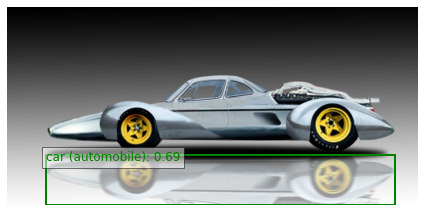

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image

# Extract the necessary values from the DataFrame
filename = df.iloc[0]["filename"]
x1 = df.iloc[0]["x1"]
y1 = df.iloc[0]["y1"]
x2 = df.iloc[0]["x2"]
y2 = df.iloc[0]["y2"]
label = df.iloc[0]["label"]
confidence = df.iloc[0]["confidence"]

# Read the image
image = Image.open(filename)

# Create a figure and axis
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
bbox = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='g', facecolor='none')

# Add the patch to the axis
ax.add_patch(bbox)

# Add label and confidence text
label_text = f"{label}: {confidence:.2f}"
ax.text(x1, y1 - 10, label_text, color='g', fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Remove the axis
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df = df.astype({'x1': int, 'y1': int, 'x2': int,  'y2': int})
df

In [ ]:
from data_flywheel.utils import create_voc_xml

In [ ]:
import os
from tqdm.auto import tqdm

output_directory = 'pascal_voc_annotations'
os.makedirs(output_directory, exist_ok=True)

grouped_df = df.groupby('filename').apply(lambda x: x.to_dict('records')).reset_index(name='objects')

for row in tqdm(grouped_df.itertuples(index=False), total=len(grouped_df), desc='Generating annotations', unit=' imgs'):
    filename = row.filename
    objects = row.objects
    create_voc_xml(filename, objects, output_directory)